In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [151]:
# from util.clean_data import clean_dataset, pad_topic_list, pad_score_list
import importlib
import util.clean_data as clean_data

importlib.reload(clean_data)

<module 'util.clean_data' from '/Users/monika/fair-bibliography-discovery-reinforcement-learning/src/util/clean_data.py'>

In [153]:
clean_data.clean_dataset(full_df)['topics.display_name'].apply(lambda x: clean_data.pad_topic_list(x, max_len=3, pad_token="<PAD>"))

0        [scientometrics and bibliometrics research, <P...
1        [scientometrics and bibliometrics research, De...
2        [scientometrics and bibliometrics research, <P...
3        [scientometrics and bibliometrics research, Bi...
4        [scientometrics and bibliometrics research, Ac...
                               ...                        
50195    [scientometrics and bibliometrics research, <P...
50196    [scientometrics and bibliometrics research, Ir...
50197    [scientometrics and bibliometrics research, In...
50198    [scientometrics and bibliometrics research, <P...
50199    [scientometrics and bibliometrics research, Re...
Name: topics.display_name, Length: 50027, dtype: object

In [73]:
full_df = pd.read_csv("../data/scientometrics-and-bibliometrics-research.csv", low_memory=False)

In [74]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50200 entries, 0 to 50199
Columns: 180 entries, id to counts_by_year.cited_by_count
dtypes: bool(5), float64(15), int64(8), object(152)
memory usage: 67.3+ MB


In [75]:
full_df.columns.to_list()

['id',
 'doi',
 'title',
 'display_name',
 'publication_year',
 'publication_date',
 'language',
 'type',
 'type_crossref',
 'indexed_in',
 'countries_distinct_count',
 'institutions_distinct_count',
 'corresponding_author_ids',
 'corresponding_institution_ids',
 'apc_paid',
 'fwci',
 'has_fulltext',
 'cited_by_count',
 'is_retracted',
 'is_paratext',
 'locations_count',
 'datasets',
 'versions',
 'referenced_works_count',
 'referenced_works',
 'related_works',
 'cited_by_api_url',
 'updated_date',
 'created_date',
 'ids.openalex',
 'ids.doi',
 'ids.mag',
 'primary_location.is_oa',
 'primary_location.landing_page_url',
 'primary_location.pdf_url',
 'primary_location.source.id',
 'primary_location.source.display_name',
 'primary_location.source.issn_l',
 'primary_location.source.issn',
 'primary_location.source.is_oa',
 'primary_location.source.is_in_doaj',
 'primary_location.source.is_indexed_in_scopus',
 'primary_location.source.is_core',
 'primary_location.source.host_organization',


Select relevant columns

In [113]:
df = full_df[['title', 'publication_year', 'cited_by_count', 'topics.display_name', 'topics.score']].copy()

In [114]:
df['topics.score'] = df['topics.score'].astype('object').str.split('|').apply(
    lambda x: list(map(float, x)) if isinstance(x, list) else []
)

df['topics.display_name'] = df['topics.display_name'].astype('object').str.split('|')

In [122]:
df.dropna(subset=['title'], inplace=True)

Plot distribution

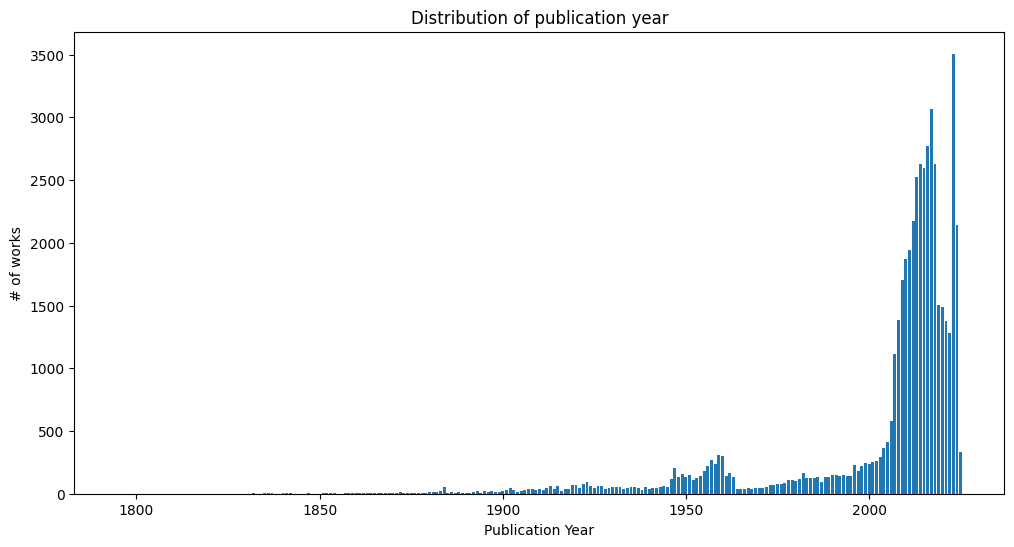

In [70]:
publication_year_count = df['publication_year'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(publication_year_count.index, publication_year_count.values)
plt.title("Distribution of publication year")
plt.xlabel("Publication Year")
plt.ylabel("# of works")
plt.show()

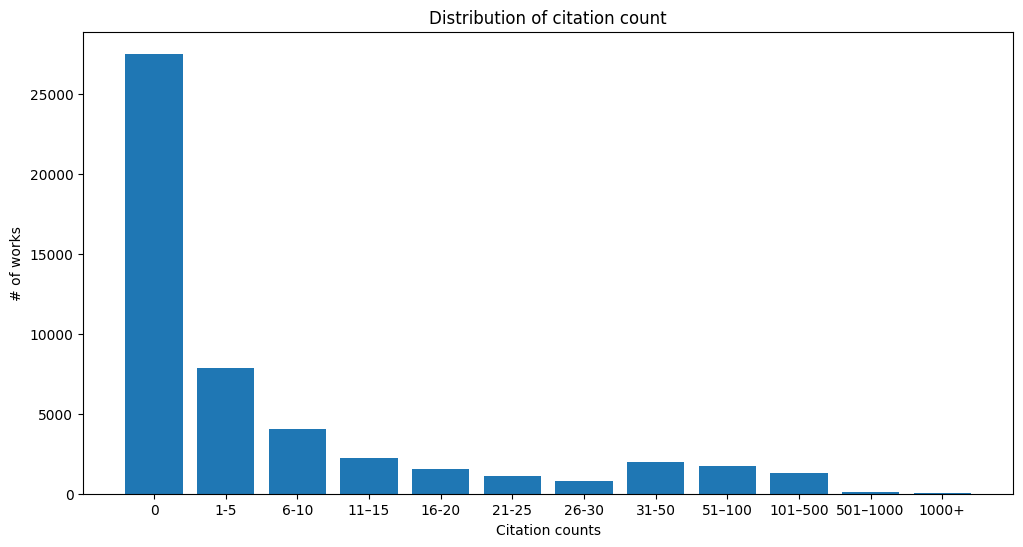

In [69]:
bins = [0, 1, 5, 10, 15, 20, 25, 30, 50, 100, 500, 1000, df['cited_by_count'].max()]
labels = ['0', '1-5', '6-10', '11–15', '16-20', '21-25', '26-30', '31-50', '51–100', '101–500', '501–1000', '1000+']

cited_by_count = pd.cut(df['cited_by_count'], bins=bins, labels=labels, include_lowest=True).value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(cited_by_count.index, cited_by_count.values)
plt.title("Distribution of citation count")
plt.xlabel("Citation counts")
plt.ylabel("# of works")
plt.show()

In [98]:
topic_count.sort_values(ascending=False)

topics.display_name
scientometrics and bibliometrics research               50199
Academic Publishing and Open Access                      6038
Academic Writing and Publishing                          5059
Research Data Management Practices                       3346
Health and Medical Research Impacts                      2772
                                                        ...  
Facilities and Workplace Management                         1
Advanced Proteomics Techniques and Applications             1
Hemophilia Treatment and Research                           1
Qualitative Research Methods and Applications               1
Layered Double Hydroxides Synthesis and Applications        1
Name: count, Length: 832, dtype: int64

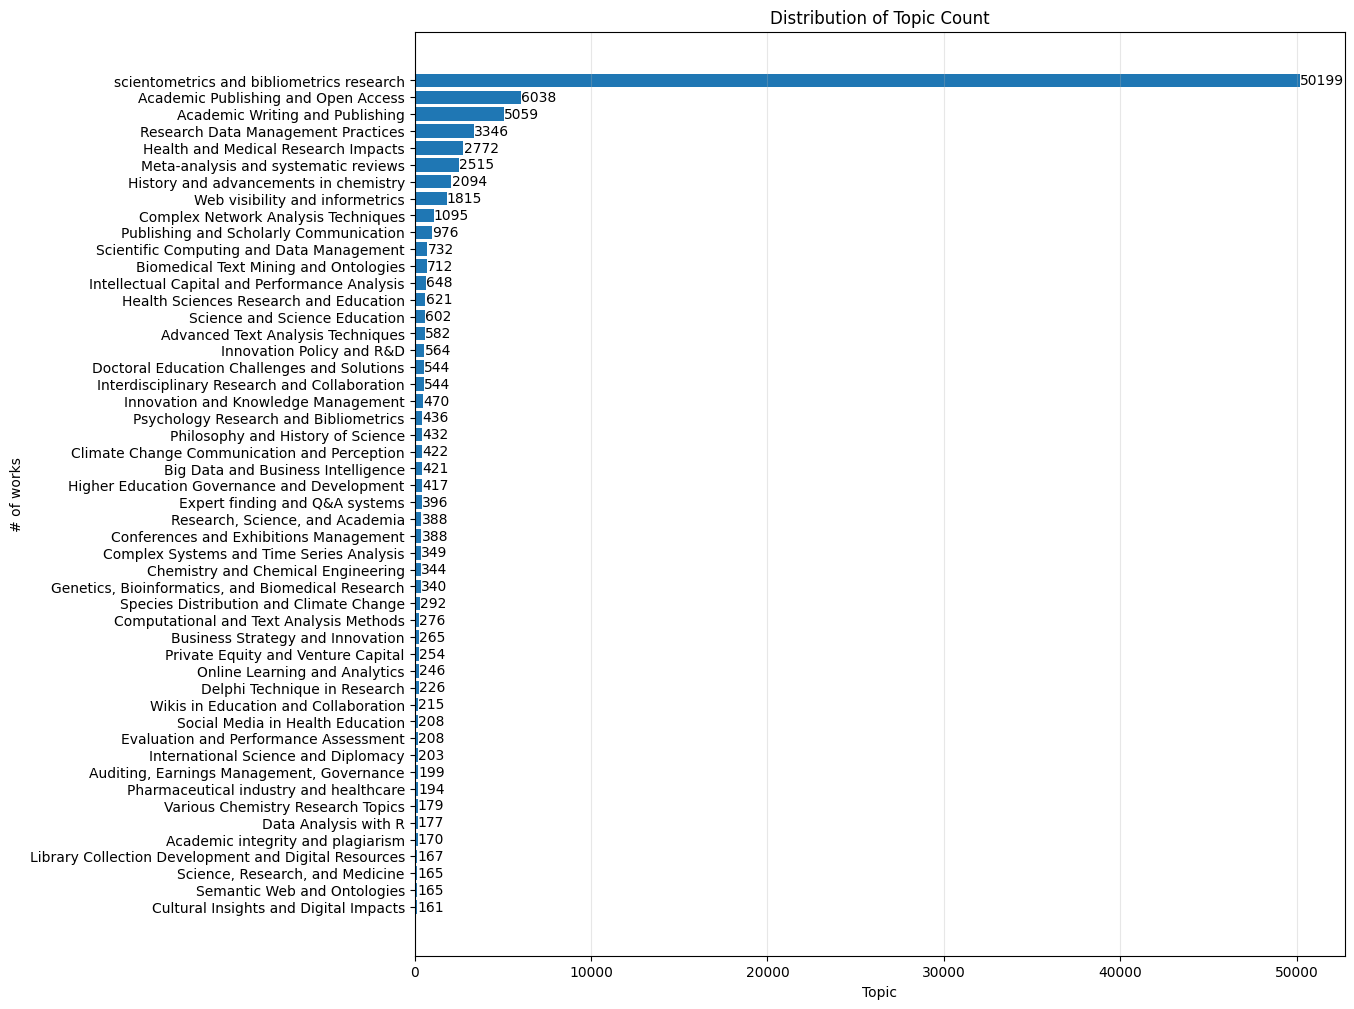

In [106]:
topic_count = df['topics.display_name'].astype('object').str.split('|').explode().value_counts()

plt.figure(figsize=(12, 12))
plt.barh(topic_count.index[:50][::-1], topic_count.values[:50][::-1])

for i, v in enumerate(topic_count.values[:50][::-1]):
    plt.text(v + 5, i, str(v), va='center')

plt.title("Distribution of Topic Count")
plt.xlabel("Topic")
plt.ylabel("# of works")
plt.grid(axis='x', alpha=0.3)
plt.show()

Normalize `publication_year` and `cited_by_count`.

In [139]:
year_min = df['publication_year'].min()

# Min-Max scale the log-transformed year
scaler = MinMaxScaler()
df['publication_year_norm'] = scaler.fit_transform(pd.DataFrame(np.log1p(df['publication_year'] - year_min + 1)))

In [137]:
year_min = df['cited_by_count'].min()

# Min-Max scale the log-transformed year
scaler = MinMaxScaler()
df['cited_by_count_norm'] = scaler.fit_transform(pd.DataFrame(np.log1p(df['cited_by_count'] - year_min + 1)))

In [140]:
df

,title,publication_year,cited_by_count,topics.display_name,topics.score,cited_by_count_norm,publication_year_norm
0,How to conduct a bibliometric analysis: An ove...,2021,6635,[scientometrics and bibliometrics research],[0.9736],1.000000,0.996341
1,Analyzing the past to prepare for the future: ...,2002,6002,"[scientometrics and bibliometrics research, De...","[0.8112, 0.8084, 0.7988]",0.987637,0.978037
2,Co‐citation in the scientific literature: A ne...,1973,4591,[scientometrics and bibliometrics research],[0.9994],0.954593,0.946613
3,"Comparison of PubMed, Scopus, Web of Science, ...",2007,3769,"[scientometrics and bibliometrics research, Bi...","[0.9943, 0.9924, 0.9793]",0.930270,0.983010
4,The journal coverage of Web of Science and Sco...,2015,3167,"[scientometrics and bibliometrics research, Ac...","[0.9994, 0.9448, 0.9224]",0.908817,0.990731
...,...,...,...,...,...,...,...
50195,Issue Publication Information,2018,0,[scientometrics and bibliometrics research],[0.5676],0.000000,0.993555
50196,W. A. TAYLOR and CO.,1961,0,"[scientometrics and bibliometrics research, Ir...","[0.8668, 0.8155, 0.7664]",0.000000,0.932099
50197,VARIAN associates,1962,0,"[scientometrics and bibliometrics research, In...","[0.2804, 0.2517]",0.000000,0.933348
50198,scientific products,1963,0,[scientometrics and bibliometrics research],[0.315],0.000000,0.934589


In [141]:
df.to_csv("../data/cleaned-scientometrics-and-bibliometrics-research.csv", header=True, index=False)